In [270]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_columns = 100
%matplotlib inline 

In [271]:
train_path = '/home/tefi/Desktop/Data/train.csv'
test_path = '/home/tefi/Desktop/Data/test.csv'

In [272]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [273]:
train.head(2)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.08904,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.00007,B,B,46,10309,1,240.0,1,16,B,300009.450063


In [274]:
train.shape

(10000, 20)

In [275]:
test.head(2)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B


In [276]:
test.shape

(5000, 19)

In [277]:
train_data = train.drop(['Price'], axis=1).copy()
train_data.head(2)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.08904,B,B,33,7976,5,NaN,0,11,B
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.00007,B,B,46,10309,1,240.0,1,16,B


In [278]:
train_price = train['Price'].copy()
train_price.head(2)

0    184966.930730
1    300009.450063
Name: Price, dtype: float64

In [279]:
train_data.shape

(10000, 19)

In [280]:
train_price.shape

(10000,)

In [281]:
test_data = test.copy()
test_data.head(2)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B


In [282]:
test_data.shape

(5000, 19)

In [283]:
train_data.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
dtype: object

In [284]:
train_data['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [285]:
train_data['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [286]:
train_data['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

In [287]:
train_data = pd.concat([train_data, pd.get_dummies(train_data['Ecology_2'], prefix='Ecoligy_2')], axis=1)
train_data = pd.concat([train_data, pd.get_dummies(train_data['Ecology_3'], prefix='Ecoligy_3')], axis=1)
train_data = pd.concat([train_data, pd.get_dummies(train_data['Shops_2'], prefix='Shops_2')], axis=1)
train_data.drop(['Ecology_2', 'Ecology_3', 'Shops_2'], axis=1, inplace=True)
train_data.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Ecoligy_2_A        uint8
Ecoligy_2_B        uint8
Ecoligy_3_A        uint8
Ecoligy_3_B        uint8
Shops_2_A          uint8
Shops_2_B          uint8
dtype: object

In [288]:
train_data.head(2)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.08904,33,7976,5,NaN,0,11,0,1,0,1,0,1
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.00007,46,10309,1,240.0,1,16,0,1,0,1,0,1


In [289]:
train_data.shape

(10000, 22)

In [290]:
train_data.isnull().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Ecoligy_2_A         0
Ecoligy_2_B         0
Ecoligy_3_A         0
Ecoligy_3_B         0
Shops_2_A           0
Shops_2_B           0
dtype: int64

In [291]:
median_1 = train_data['Healthcare_1'].median()
median_1

900.0

In [292]:
train_data['Healthcare_1'] = train_data['Healthcare_1'].fillna(median_1)

In [293]:
train_data.isnull().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1        0
Helthcare_2         0
Shops_1             0
Ecoligy_2_A         0
Ecoligy_2_B         0
Ecoligy_3_A         0
Ecoligy_3_B         0
Shops_2_A           0
Shops_2_B           0
dtype: int64

In [294]:
median_r1 = (train_data.loc[(train_data['Rooms']==1.0), 'LifeSquare']).median()
median_r1

21.66392883217304

In [295]:
median_r2 = (train_data.loc[(train_data['Rooms']==2.0), 'LifeSquare']).median()
median_r2

32.5521342349919

In [296]:
median_r3 = (train_data.loc[(train_data['Rooms']==3.0), 'LifeSquare']).median()
median_r3

46.96048008775955

In [297]:
median_r4 = (train_data.loc[(train_data['Rooms']==4.0), 'LifeSquare']).median()
median_r4

64.94654758809416

In [298]:
median_r5 = (train_data.loc[(train_data['Rooms']==5.0), 'LifeSquare']).median()
median_r5

80.45891031600135

In [299]:
median_s = (train_data['Square']).median()
median_ls = (train_data['LifeSquare']).median()
median_p1 = median_ls / median_s
median_p1

0.6242466955442353

In [300]:
median_p2 = median_s / median_ls
median_p2 

1.6019307865589465

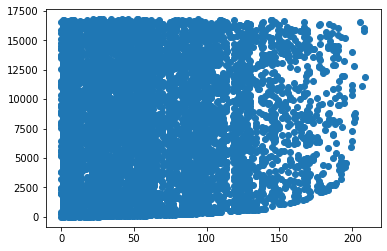

In [301]:
plt.scatter(train_data['DistrictId'], train_data['Id'])
plt.show()

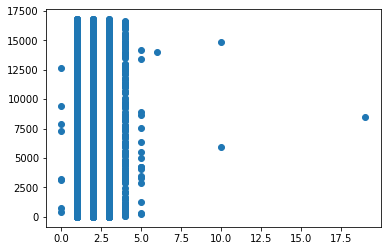

In [302]:
plt.scatter(train_data['Rooms'], train_data['Id'])
plt.show()

In [303]:
train_data.loc[(train_data['Rooms']>=6.0)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,74,19083,2,900.0,5,15,0,1,0,1,0,1
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,1,264,0,900.0,0,1,0,1,0,1,0,1
2170,14003,99,6.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,66,10573,1,1322.0,3,8,0,1,0,1,0,1
8849,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,25,5648,1,30.0,2,4,0,1,0,1,0,1


In [304]:
train_data.loc[(train_data['LifeSquare']>38.7) & (train_data['LifeSquare']<38.71)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B
55,3963,48,3.0,60.496736,38.701933,6.0,4,9.0,1980,0.041125,46,9515,5,900.0,1,10,0,1,0,1,0,1
1255,4143,25,2.0,64.221657,38.707166,10.0,17,17.0,1993,0.069753,53,13670,4,900.0,1,11,0,1,0,1,0,1
2153,2300,120,2.0,56.727069,38.708541,9.0,9,9.0,1961,0.000699,14,3369,24,4129.0,0,3,0,1,0,1,0,1
2170,14003,99,6.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,66,10573,1,1322.0,3,8,0,1,0,1,0,1


In [305]:
train_data.loc[(train_data['Rooms']==6.0), 'Rooms'] = 2

In [306]:
train_data.loc[(train_data['Rooms']==10.0), 'Rooms'] = 2

In [307]:
train_data.loc[(train_data['Rooms']==19.0), 'Rooms'] = 1

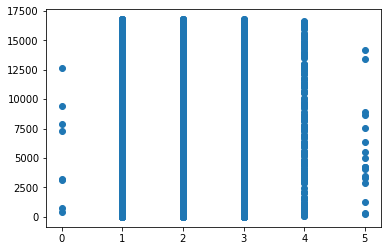

In [308]:
plt.scatter(train_data['Rooms'], train_data['Id'])
plt.show()

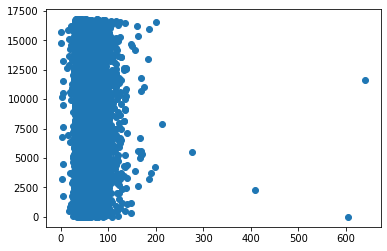

In [309]:
plt.scatter(train_data['Square'], train_data['Id'])
plt.show()

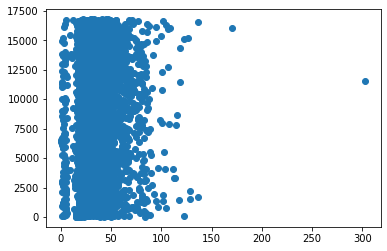

In [310]:
plt.scatter(test_data['LifeSquare'], test_data['Id'])
plt.show()

In [311]:
train_data.loc[(train_data['Square']>200)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,9,1892,0,900.0,0,1,0,1,0,1,0,1
1982,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,31,7010,5,4508.0,3,7,0,1,1,0,0,1
4262,28,9,2.0,604.705972,NaN,1.0,17,18.0,1977,0.161532,25,5648,1,30.0,2,4,0,1,0,1,0,1
4690,2307,102,1.0,409.425181,410.639749,10.0,4,4.0,2016,0.238617,26,3889,6,705.0,3,6,0,1,0,1,0,1
6977,11602,30,2.0,641.065193,638.163193,10.0,20,19.0,2019,0.000078,22,6398,141,1046.0,3,23,0,1,0,1,0,1
9910,16568,27,4.0,200.334539,201.627361,25.0,1,2.0,2013,0.041116,53,14892,4,900.0,1,4,0,1,0,1,0,1


In [312]:
train_data.loc[(train_data['Id']==28), 'LifeSquare'] = (train_data['Square'] * 0.6)

In [313]:
train_data.loc[(train_data['Id']==28)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B
4262,28,9,2.0,604.705972,362.823583,1.0,17,18.0,1977,0.161532,25,5648,1,30.0,2,4,0,1,0,1,0,1


In [314]:
train_data.loc[(train_data['LifeSquare']>200)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B
590,14990,23,2.0,48.449873,263.542020,5.0,6,5.0,1972,0.075779,6,1437,3,900.0,0,2,0,1,0,1,0,1
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,9,1892,0,900.0,0,1,0,1,0,1,0,1
1982,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,31,7010,5,4508.0,3,7,0,1,1,0,0,1
4262,28,9,2.0,604.705972,362.823583,1.0,17,18.0,1977,0.161532,25,5648,1,30.0,2,4,0,1,0,1,0,1
4328,16550,27,3.0,81.694417,7480.592129,1.0,9,17.0,2016,0.017647,2,469,0,900.0,0,0,0,1,0,1,0,1
4690,2307,102,1.0,409.425181,410.639749,10.0,4,4.0,2016,0.238617,26,3889,6,705.0,3,6,0,1,0,1,0,1
6977,11602,30,2.0,641.065193,638.163193,10.0,20,19.0,2019,0.000078,22,6398,141,1046.0,3,23,0,1,0,1,0,1
8437,15886,85,3.0,78.059331,461.463614,10.0,12,16.0,1998,0.037178,52,11217,1,2300.0,1,7,0,1,0,1,0,1
9910,16568,27,4.0,200.334539,201.627361,25.0,1,2.0,2013,0.041116,53,14892,4,900.0,1,4,0,1,0,1,0,1


In [315]:
train_data.loc[train_data['Id']==16550, 'LifeSquare'] = (train_data['Square']*0.6)

In [316]:
train_data.loc[train_data['Id']==14990, 'LifeSquare'] = (train_data['Square']*0.6)

In [317]:
train_data.loc[train_data['Id']==15886, 'LifeSquare'] = (train_data['Square']*0.6)

In [318]:
train_data.isnull().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2112
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1        0
Helthcare_2         0
Shops_1             0
Ecoligy_2_A         0
Ecoligy_2_B         0
Ecoligy_3_A         0
Ecoligy_3_B         0
Shops_2_A           0
Shops_2_B           0
dtype: int64

In [319]:
train_data.loc[train_data['LifeSquare'].isnull(), 'LifeSquare'] = (train_data['Square']*0.6)

In [320]:
train_data.isnull().sum()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Ecoligy_2_A      0
Ecoligy_2_B      0
Ecoligy_3_A      0
Ecoligy_3_B      0
Shops_2_A        0
Shops_2_B        0
dtype: int64

In [321]:
train_data.loc[(train_data['Square']<=10)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B
212,1748,88,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,43,8429,3,900.0,3,9,0,1,0,1,0,1
1316,11526,27,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,4,915,0,900.0,0,0,0,1,0,1,0,1
1608,10202,6,1.0,2.596351,4.604943,1.0,3,25.0,2014,0.243205,5,1564,0,540.0,0,0,0,1,0,1,0,1
3280,10527,27,1.0,4.380726,40.805837,1.0,10,17.0,2013,0.211401,9,1892,0,900.0,0,1,0,1,0,1,0,1
3413,9487,5,1.0,5.129222,5.549458,1.0,1,1.0,1977,0.150818,16,3433,4,2643.0,4,5,0,1,0,1,0,1
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,2,469,0,900.0,0,0,0,1,0,1,0,1
4900,4504,27,3.0,4.390331,5.610772,1.0,8,19.0,2016,0.211401,9,1892,0,900.0,0,1,0,1,0,1,0,1
6392,14786,1,1.0,1.136859,4.525736,1.0,3,1.0,1977,0.007122,1,264,0,900.0,0,1,0,1,0,1,0,1
8030,13265,1,3.0,4.823679,79.767964,0.0,6,17.0,1977,0.007122,1,264,0,900.0,0,1,0,1,0,1,0,1
8283,15744,34,1.0,1.988943,2.642219,1.0,21,4.0,1977,0.069753,53,13670,4,900.0,1,11,0,1,0,1,0,1


In [322]:
train_data.loc[(train_data['Square']<=train_data['LifeSquare'])].head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B
28,8054,23,1.0,42.530043,43.967759,1.0,3,9.0,2014,0.034656,0,168,0,900.0,0,0,0,1,0,1,0,1
44,10521,38,3.0,104.211396,106.340403,0.0,20,0.0,2017,0.060753,15,2787,2,520.0,0,7,0,1,0,1,0,1
52,2301,1,2.0,61.400054,65.224603,0.0,17,22.0,2016,0.007122,1,264,0,900.0,0,1,0,1,0,1,0,1
123,8753,25,3.0,85.952306,89.803753,1.0,4,3.0,2017,0.069753,53,13670,4,900.0,1,11,0,1,0,1,0,1
153,9870,62,1.0,51.831473,53.491301,1.0,5,1.0,2015,0.072158,2,629,1,900.0,0,0,0,1,0,1,1,0
178,2416,57,1.0,29.298168,29.770784,5.0,7,5.0,1964,0.133215,49,11395,3,1406.0,3,4,0,1,0,1,1,0
184,3398,74,1.0,48.743665,51.011232,1.0,12,20.0,2017,0.075779,6,1437,3,900.0,0,2,0,1,0,1,0,1
212,1748,88,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,43,8429,3,900.0,3,9,0,1,0,1,0,1
217,5540,27,3.0,57.643613,59.425078,9.0,16,10.0,1977,0.072158,2,629,1,900.0,0,0,0,1,0,1,1,0
234,12633,27,3.0,81.867166,81.884548,0.0,12,19.0,1977,0.211401,9,1892,0,900.0,0,1,0,1,0,1,0,1


In [323]:
train_data.loc[(train_data['Square']<=train_data['LifeSquare']), 'Square'] = train['LifeSquare']

In [324]:
train_data.loc[(train_data['Square']<=train_data['LifeSquare']), 'LifeSquare'] = train['Square']

In [325]:
train_data.loc[(train_data['Id']==8054)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B
28,8054,23,1.0,43.967759,42.530043,1.0,3,9.0,2014,0.034656,0,168,0,900.0,0,0,0,1,0,1,0,1


In [326]:
train_data.loc[(train_data['LifeSquare']<=10) & (train_data['Square']>20)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B
26,4378,27,3.0,106.958871,0.641822,0.0,17,0.0,2018,0.072158,2,629,1,900.0,0,0,0,1,0,1,1,0
95,4280,34,2.0,61.334968,4.091945,1.0,26,1.0,2014,0.069753,53,13670,4,900.0,1,11,0,1,0,1,0,1
134,12613,6,2.0,65.496674,5.589324,1.0,5,17.0,1977,0.243205,5,1564,0,540.0,0,0,0,1,0,1,0,1
158,16779,27,3.0,51.991064,4.896202,1.0,22,25.0,1977,0.072158,2,629,1,900.0,0,0,0,1,0,1,1,0
160,3522,6,1.0,66.419841,3.987101,1.0,2,1.0,1977,0.243205,5,1564,0,540.0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,13583,27,2.0,58.943039,3.319486,1.0,11,17.0,2017,0.011654,4,915,0,900.0,0,0,0,1,0,1,0,1
9813,2040,62,1.0,122.438148,5.751401,1.0,2,3.0,1977,0.072158,2,629,1,900.0,0,0,0,1,0,1,1,0
9828,13630,24,3.0,127.141143,4.811405,1.0,3,1.0,2017,0.111627,50,12238,8,1970.0,2,3,0,1,0,1,0,1
9888,6053,6,1.0,41.314775,5.005477,1.0,9,17.0,2016,0.243205,5,1564,0,540.0,0,0,0,1,0,1,0,1


In [327]:
train_data.loc[(train_data['LifeSquare']<=10) & (train_data['Square']>20), 'LifeSquare'] = (train_data['Square']*0.6)

In [328]:
train_data.loc[(train_data['Id']==4378)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B
26,4378,27,3.0,106.958871,64.175323,0.0,17,0.0,2018,0.072158,2,629,1,900.0,0,0,0,1,0,1,1,0


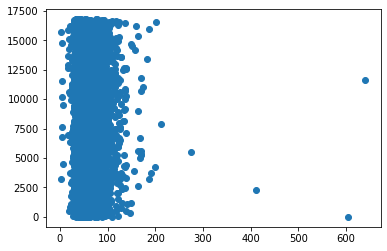

In [329]:
plt.scatter(train_data['Square'], train_data['Id'])
plt.show()

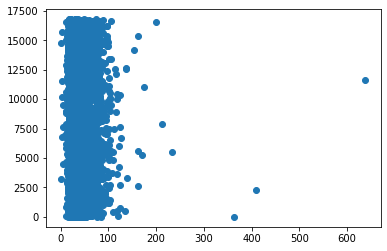

In [330]:
plt.scatter(train_data['LifeSquare'], train_data['Id'])
plt.show()

In [331]:
train_data.head(2)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.08904,33,7976,5,900.0,0,11,0,1,0,1,0,1
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.00007,46,10309,1,240.0,1,16,0,1,0,1,0,1


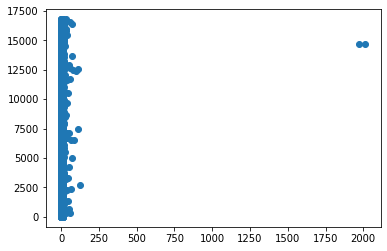

In [332]:
plt.scatter(train_data['KitchenSquare'], train_data['Id'])
plt.show()

In [333]:
train_data.loc[(train_data['KitchenSquare'])>200]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B
1064,14656,62,1.0,47.100719,46.447960,2014.0,4,1.0,2014,0.072158,2,629,1,900.0,0,0,0,1,0,1,1,0
8584,14679,81,1.0,32.276663,19.278394,1970.0,6,1.0,1977,0.006076,30,5285,0,645.0,6,6,0,1,0,1,0,1


In [334]:
median_k1 = train_data.loc[(train_data['Rooms']==1) & (train_data['KitchenSquare']>=2), ['KitchenSquare']].median()
median_k1

KitchenSquare    8.0
dtype: float64

In [335]:
median_k3 = train_data.loc[(train_data['Rooms']==3) & (train_data['KitchenSquare']>=2), ['KitchenSquare']].median()
median_k3

KitchenSquare    9.0
dtype: float64

In [336]:
median_k5 = train_data.loc[(train_data['Rooms']==5) & (train_data['KitchenSquare']>=2), ['KitchenSquare']].median()
median_k5

KitchenSquare    9.5
dtype: float64

In [337]:
train_data.loc[(train_data['Id']==14656), ['KitchenSquare']] = 0

In [338]:
train_data.loc[(train_data['Id']==14679), ['KitchenSquare']] = 8

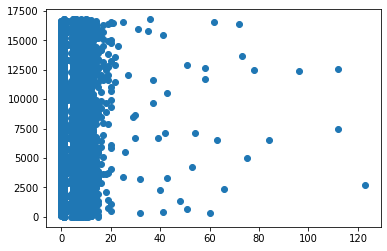

In [339]:
plt.scatter(train_data['KitchenSquare'], train_data['Id'])
plt.show()

In [340]:
train_data.loc[(train_data['KitchenSquare'])>(train_data['Square'])]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B
5149,13703,42,1.0,38.071692,19.723548,73.0,9,10.0,2006,0.158249,21,5731,0,900.0,1,0,0,1,0,1,0,1
7088,6569,27,1.0,38.220258,18.716856,84.0,4,17.0,2018,0.011654,4,915,0,900.0,0,0,0,1,0,1,0,1


In [341]:
train_data.loc[(train_data['KitchenSquare'])>(train_data['Square']), ['KitchenSquare']] = 8

In [342]:
train_data.loc[(train_data['KitchenSquare'])>45]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B
227,16395,2,3.0,79.722243,44.731219,72.0,12,16.0,1987,0.130618,39,10418,9,900.0,1,9,0,1,0,1,0,1
551,1315,6,1.0,48.128114,45.023531,48.0,21,1.0,2013,0.243205,5,1564,0,540.0,0,0,0,1,0,1,0,1
1369,2371,27,2.0,68.841073,64.234956,66.0,4,2.0,2014,0.017647,2,469,0,900.0,0,0,0,1,0,1,0,1
1455,12507,54,2.0,79.810535,79.578961,78.0,10,15.0,2014,0.006076,30,5285,0,645.0,6,6,0,1,0,1,0,1
1860,4265,161,2.0,53.216778,32.644859,53.0,7,17.0,1994,0.000699,14,3369,24,4129.0,0,3,0,1,0,1,0,1
2916,12390,72,3.0,99.323558,97.490674,96.0,22,25.0,2019,0.210473,11,2398,2,1994.0,3,0,0,1,0,1,0,1
2969,7441,62,3.0,114.734473,112.589083,112.0,3,3.0,2015,0.072158,2,629,1,900.0,0,0,0,1,0,1,1,0
4079,6508,23,2.0,67.146049,33.959154,63.0,5,17.0,2019,0.034656,0,168,0,900.0,0,0,0,1,0,1,0,1
4110,299,27,2.0,66.787523,64.616662,60.0,14,20.0,2015,0.017647,2,469,0,900.0,0,0,0,1,0,1,0,1
4651,12552,58,3.0,116.405693,113.109653,112.0,3,3.0,2016,0.437885,23,5735,3,1084.0,0,5,0,1,0,1,0,1


In [343]:
train_data.loc[(train_data['KitchenSquare'])>45, 'KitchenSquare']= ((train_data['Square'] - train_data['LifeSquare'])*0.3)

In [344]:
train_data.loc[(train_data['Id'])==4966]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B
6240,4966,96,3.0,78.445675,47.146757,9.389675,9,12.0,1977,0.041116,53,14892,4,900.0,1,4,0,1,0,1,0,1


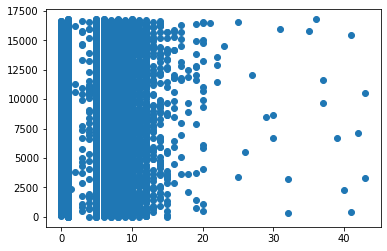

In [345]:
plt.scatter(train_data['KitchenSquare'], train_data['Id'])
plt.show()

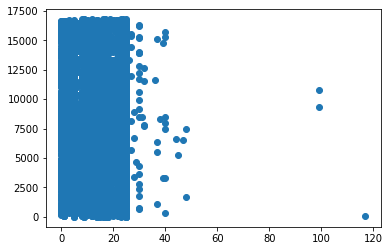

In [346]:
plt.scatter(train_data['HouseFloor'], train_data['Id'])
plt.show()

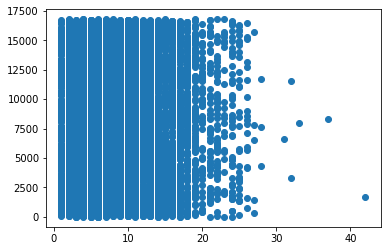

In [347]:
plt.scatter(train_data['Floor'], train_data['Id'])
plt.show()

In [348]:
train_data.loc[train_data['HouseFloor']>50]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B
6131,10806,5,1.0,51.944587,48.709601,1.0,6,99.0,1977,0.150818,16,3433,4,2643.0,4,5,0,1,0,1,0,1
8599,9300,74,2.0,74.579809,71.747869,9.0,5,99.0,1977,0.075779,6,1437,3,900.0,0,2,0,1,0,1,0,1
8854,78,30,2.0,66.811789,65.773749,1.0,8,117.0,1977,0.000078,22,6398,141,1046.0,3,23,0,1,0,1,0,1


In [349]:
train_data.loc[train_data['Floor']>50]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B


In [350]:
train_data.loc[train_data['HouseFloor']==0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B
7,11993,74,2.0,80.312926,48.187755,0.0,14,0.0,1977,0.075779,6,1437,3,900.0,0,2,0,1,0,1,0,1
23,6641,54,3.0,118.907612,71.344567,0.0,2,0.0,1977,0.006076,30,5285,0,645.0,6,6,0,1,0,1,0,1
26,4378,27,3.0,106.958871,64.175323,0.0,17,0.0,2018,0.072158,2,629,1,900.0,0,0,0,1,0,1,1,0
39,9371,23,2.0,60.503248,36.301949,0.0,16,0.0,1977,0.034656,0,168,0,900.0,0,0,0,1,0,1,0,1
44,10521,38,3.0,106.340403,104.211396,0.0,20,0.0,2017,0.060753,15,2787,2,520.0,0,7,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9707,12302,30,1.0,48.307844,46.072913,0.0,4,0.0,1977,0.000078,22,6398,141,1046.0,3,23,0,1,0,1,0,1
9769,9384,59,3.0,98.607328,59.164397,0.0,14,0.0,1977,0.019509,37,7687,11,176.0,5,5,0,1,0,1,0,1
9878,11441,62,2.0,72.453232,71.985335,0.0,5,0.0,1977,0.072158,2,629,1,900.0,0,0,0,1,0,1,1,0
9908,3171,62,1.0,35.873961,21.524377,0.0,25,0.0,1977,0.072158,2,629,1,900.0,0,0,0,1,0,1,1,0


In [351]:
train_data.loc[train_data['HouseFloor']==0, 'HouseFloor'] = train_data['Floor']

In [352]:
train_data.loc[train_data['Id']==3171]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B
9908,3171,62,1.0,35.873961,21.524377,0.0,25,25.0,1977,0.072158,2,629,1,900.0,0,0,0,1,0,1,1,0


In [353]:
train_data.loc[train_data['Floor']==0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B


In [354]:
train_data.loc[train_data['Floor']>train_data['HouseFloor']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B
14,10953,27,1.0,53.769097,52.408027,1.0,5,4.0,1977,0.072158,2,629,1,900.0,0,0,0,1,0,1,1,0
16,2119,27,2.0,49.360648,31.993964,5.0,6,5.0,1983,0.051815,5,1227,0,900.0,0,0,0,1,0,1,0,1
21,11935,27,2.0,64.711835,38.827101,1.0,15,1.0,1977,0.211401,9,1892,0,900.0,0,1,0,1,0,1,0,1
35,6486,200,3.0,85.280389,58.447967,9.0,6,5.0,1960,0.000000,33,7425,1,900.0,2,5,0,1,0,1,0,1
51,10103,94,1.0,35.280894,23.354176,6.0,11,9.0,1971,0.282798,33,8667,2,900.0,0,6,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,2237,52,3.0,64.074977,47.633428,6.0,11,9.0,1983,0.371149,34,7065,1,750.0,2,5,0,1,0,1,0,1
9985,16159,27,1.0,38.968338,23.381003,1.0,10,1.0,1977,0.211401,9,1892,0,900.0,0,1,0,1,0,1,0,1
9989,4145,96,3.0,90.055233,47.860231,11.0,26,24.0,2005,0.041116,53,14892,4,900.0,1,4,0,1,0,1,0,1
9991,11553,3,3.0,101.622794,51.628780,12.0,18,17.0,2000,0.265089,37,5288,0,1937.0,3,2,0,1,0,1,0,1


In [355]:
train_data_1 = train_data.copy()

In [356]:
train_data.loc[train_data['Floor']>train_data['HouseFloor'], 'HouseFloor'] = train_data_1['Floor']

In [357]:
train_data.loc[train_data['Floor']>=train_data['HouseFloor'], 'Floor'] = train_data_1['HouseFloor']

In [358]:
train_data.loc[train_data['Id']==77]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B
9995,77,32,2.0,50.401785,30.476203,5.0,5.0,6.0,1968,0.13565,46,7960,6,350.0,3,11,0,1,0,1,0,1


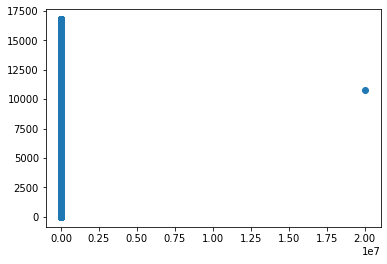

In [359]:
plt.scatter(train_data['HouseYear'], train_data['Id'])
plt.show()

In [360]:
train_data.loc[(train_data['HouseYear'])>2020]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B
1497,10814,109,1.0,37.265070,20.239714,9.0,9.0,12.0,20052011,0.136330,30,6141,10,262.0,3,6,0,1,0,1,0,1
4189,11607,147,2.0,44.791836,28.360393,5.0,4.0,9.0,4968,0.319809,25,4756,16,2857.0,5,8,0,1,0,1,0,1


In [361]:
train_data.loc[(train_data['HouseYear'])<2021, 'HouseYear'].median()

1977.0

In [362]:
#train_data.loc[(train_data['HouseYear'])>2020, 'HouseYear'] = train_data.loc[(train_data['HouseYear'])<2021, 'HouseYear'].median()

In [363]:
train_data.loc[(train_data['HouseYear'])>5000, 'HouseYear'] = 2005

In [364]:
train_data.loc[(train_data['HouseYear'])>2021, 'HouseYear'] = 1968

In [365]:
train_data.loc[(train_data['Id'])==11607]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B
4189,11607,147,2.0,44.791836,28.360393,5.0,4.0,9.0,1968,0.319809,25,4756,16,2857.0,5,8,0,1,0,1,0,1


In [366]:
train_data.loc[(train_data['HouseYear'])<1900]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B


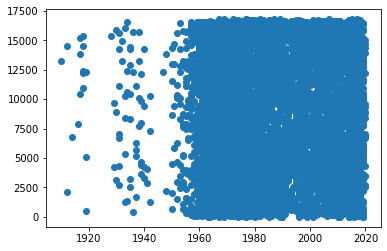

In [367]:
plt.scatter(train_data['HouseYear'], train_data['Id'])
plt.show()

In [368]:
test_data.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
dtype: object

In [369]:
test_data = pd.concat([test_data, pd.get_dummies(test_data['Ecology_2'], prefix='Ecoligy_2')], axis=1)
test_data = pd.concat([test_data, pd.get_dummies(test_data['Ecology_3'], prefix='Ecoligy_3')], axis=1)
test_data = pd.concat([test_data, pd.get_dummies(test_data['Shops_2'], prefix='Shops_2')], axis=1)
test_data.drop(['Ecology_2', 'Ecology_3', 'Shops_2'], axis=1, inplace=True)
test_data.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Ecoligy_2_A        uint8
Ecoligy_2_B        uint8
Ecoligy_3_A        uint8
Ecoligy_3_B        uint8
Shops_2_A          uint8
Shops_2_B          uint8
dtype: object

In [370]:
test_data.head(2)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,11,2748,1,NaN,0,0,0,1,0,1,0,1
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,6,1437,3,NaN,0,2,0,1,0,1,0,1


In [371]:
test_data.shape

(5000, 22)

In [372]:
test_data.isnull().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       1041
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     2377
Helthcare_2         0
Shops_1             0
Ecoligy_2_A         0
Ecoligy_2_B         0
Ecoligy_3_A         0
Ecoligy_3_B         0
Shops_2_A           0
Shops_2_B           0
dtype: int64

In [374]:
test_data['Healthcare_1'] = test_data['Healthcare_1'].fillna(train_data['Healthcare_1'].median())

In [375]:
test_data.isnull().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       1041
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1        0
Helthcare_2         0
Shops_1             0
Ecoligy_2_A         0
Ecoligy_2_B         0
Ecoligy_3_A         0
Ecoligy_3_B         0
Shops_2_A           0
Shops_2_B           0
dtype: int64

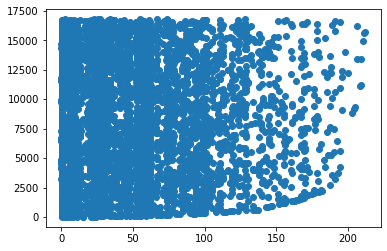

In [376]:
plt.scatter(test_data['DistrictId'], test_data['Id'])
plt.show()

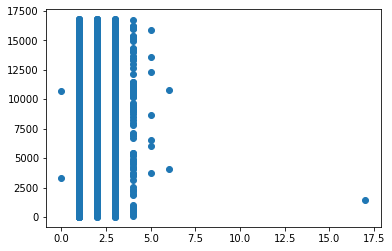

In [377]:
plt.scatter(test_data['Rooms'], test_data['Id'])

In [378]:
test_data.loc[(test_data['Rooms']>=6.0)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B
2071,10793,23,6.0,110.750226,NaN,0.0,2,2.0,2015,0.014073,2,475,0,900.0,0,0,0,1,0,1,0,1
3217,4058,27,6.0,223.453689,104.113552,16.0,2,2.0,2017,0.041116,53,14892,4,900.0,1,4,0,1,0,1,0,1
3398,1435,111,17.0,52.866107,32.528342,8.0,15,17.0,1987,0.093443,23,4635,5,3300.0,2,4,0,1,0,1,0,1


In [379]:
test_data.loc[(test_data['Rooms']==17.0), 'Rooms'] = 2

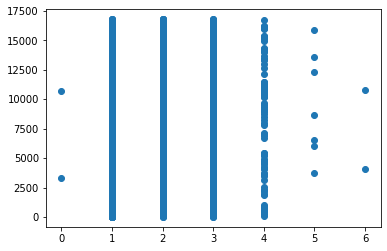

In [380]:
plt.scatter(test_data['Rooms'], test_data['Id'])
plt.show()

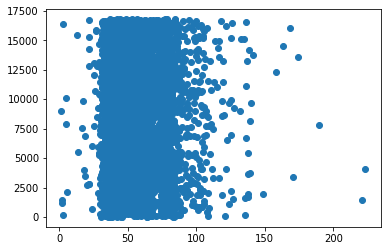

In [381]:
plt.scatter(test_data['Square'], test_data['Id'])
plt.show()

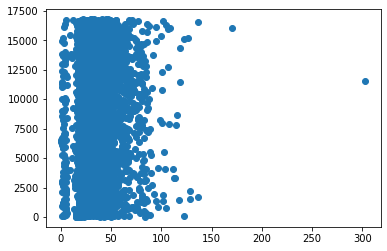

In [382]:
plt.scatter(test_data['LifeSquare'], test_data['Id'])
plt.show()

In [383]:
test_data.loc[(test_data['Square']>150)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B
1264,13589,27,3.0,173.974480,76.289475,9.0,3,3.0,2017,0.041116,53,14892,4,900.0,1,4,0,1,0,1,0,1
1499,7769,124,4.0,189.679576,114.708673,4.0,19,40.0,2013,0.174739,17,3379,9,100.0,0,3,0,1,0,1,0,1
2039,3357,27,3.0,170.476326,75.973612,8.0,2,2.0,2017,0.041116,53,14892,4,900.0,1,4,0,1,0,1,0,1
2557,16053,17,4.0,168.729035,169.901701,0.0,4,0.0,2013,0.093443,23,4635,5,3300.0,2,4,0,1,0,1,0,1
3217,4058,27,6.0,223.453689,104.113552,16.0,2,2.0,2017,0.041116,53,14892,4,900.0,1,4,0,1,0,1,0,1
3253,12316,183,5.0,157.976101,101.040485,12.0,7,8.0,1908,0.246624,14,2940,45,900.0,3,6,0,1,0,1,0,1
3909,1397,76,3.0,221.138768,118.055342,4.0,32,48.0,2011,0.000000,7,1660,39,1786.0,1,5,0,1,0,1,0,1
4384,14498,23,1.0,163.325901,NaN,1.0,3,1.0,1977,0.014073,2,475,0,900.0,0,0,0,1,0,1,0,1


In [384]:
test_data.loc[(test_data['LifeSquare']>150)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B
410,11533,94,2.0,48.713443,303.071094,6.0,5,12.0,1974,0.521867,25,6149,0,900.0,0,0,0,1,0,1,0,1
2557,16053,17,4.0,168.729035,169.901701,0.0,4,0.0,2013,0.093443,23,4635,5,3300.0,2,4,0,1,0,1,0,1


In [385]:
test_data.loc[(test_data['LifeSquare']>200), 'LifeSquare'] = (test_data['Square']*0.6)

In [386]:
test_data.loc[(test_data['Id']==11533)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B
410,11533,94,2.0,48.713443,29.228066,6.0,5,12.0,1974,0.521867,25,6149,0,900.0,0,0,0,1,0,1,0,1


In [387]:
test_data.isnull().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       1041
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1        0
Helthcare_2         0
Shops_1             0
Ecoligy_2_A         0
Ecoligy_2_B         0
Ecoligy_3_A         0
Ecoligy_3_B         0
Shops_2_A           0
Shops_2_B           0
dtype: int64

In [388]:
test_data.loc[test_data['LifeSquare'].isnull(), 'LifeSquare'] = (test_data['Square']*0.6)

In [389]:
test_data.isnull().sum()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Ecoligy_2_A      0
Ecoligy_2_B      0
Ecoligy_3_A      0
Ecoligy_3_B      0
Shops_2_A        0
Shops_2_B        0
dtype: int64

In [390]:
test_data.loc[(test_data['Square']<10)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B
66,9011,53,1.0,1.378543,1.353573,1.0,1,1.0,1977,0.049637,34,7759,0,229.0,1,3,0,1,0,1,0,1
608,16401,30,1.0,2.645046,4.338755,1.0,2,1.0,1977,0.000078,22,6398,141,1046.0,3,23,0,1,0,1,0,1
837,2138,27,1.0,5.647458,1.501582,1.0,1,1.0,1977,0.017647,2,469,0,900.0,0,0,0,1,0,1,0,1
1165,10120,6,1.0,5.100672,3.861780,1.0,3,1.0,1977,0.243205,5,1564,0,540.0,0,0,0,1,0,1,0,1
4490,1165,27,1.0,2.372101,1.899119,1.0,2,17.0,1977,0.011654,4,915,0,900.0,0,0,0,1,0,1,0,1
4540,7855,6,1.0,4.967143,2.968086,1.0,3,1.0,2018,0.243205,5,1564,0,540.0,0,0,0,1,0,1,0,1
4713,170,6,2.0,2.900586,61.468563,1.0,18,17.0,2014,0.243205,5,1564,0,540.0,0,0,0,1,0,1,0,1
4902,1420,45,1.0,1.975769,2.900371,1.0,1,1.0,1977,0.195781,23,5212,6,900.0,3,2,0,1,0,1,0,1


In [391]:
test_data.loc[(test_data['LifeSquare']<10)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B
18,3495,27,3.0,82.652818,5.690155,1.0,4,17.0,2015,0.072158,2,629,1,900.0,0,0,0,1,0,1,1,0
66,9011,53,1.0,1.378543,1.353573,1.0,1,1.0,1977,0.049637,34,7759,0,229.0,1,3,0,1,0,1,0,1
71,9205,120,2.0,85.911827,4.188395,1.0,5,1.0,2016,0.341072,27,5664,48,2300.0,3,11,0,1,0,1,0,1
77,7034,45,2.0,59.927502,3.798341,1.0,23,1.0,2017,0.195781,23,5212,6,900.0,3,2,0,1,0,1,0,1
78,6553,34,5.0,122.375273,0.333490,0.0,9,0.0,1977,0.069753,53,13670,4,900.0,1,11,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4818,8963,27,3.0,79.114387,3.329216,1.0,3,22.0,1977,0.211401,9,1892,0,900.0,0,1,0,1,0,1,0,1
4846,5002,1,3.0,82.624843,4.379317,1.0,5,17.0,2016,0.007122,1,264,0,900.0,0,1,0,1,0,1,0,1
4863,4611,27,2.0,76.709543,2.989508,1.0,13,12.0,2016,0.072158,2,629,1,900.0,0,0,0,1,0,1,1,0
4902,1420,45,1.0,1.975769,2.900371,1.0,1,1.0,1977,0.195781,23,5212,6,900.0,3,2,0,1,0,1,0,1


In [392]:
test_data.loc[(test_data['LifeSquare']<=10) & (test_data['Square']>20), 'LifeSquare'] = (test_data['Square']*0.6)

In [393]:
test_data.loc[(test_data['Square']<=test_data['LifeSquare'])].head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,30,7538,87,4702.0,5,5,0,1,0,1,0,1
27,11160,58,1.0,48.610661,48.752502,1.0,4,3.0,1977,0.437885,23,5735,3,1084.0,0,5,0,1,0,1,0,1
39,6624,27,1.0,42.413793,42.434887,10.0,12,17.0,2017,0.011654,4,915,0,900.0,0,0,0,1,0,1,0,1
43,11513,1,1.0,37.484057,40.593036,0.0,4,17.0,1977,0.007122,1,264,0,900.0,0,1,0,1,0,1,0,1
70,1872,30,2.0,52.449057,52.798349,1.0,17,17.0,2016,0.000078,22,6398,141,1046.0,3,23,0,1,0,1,0,1
102,10749,6,2.0,65.582572,66.675758,1.0,4,2.0,2017,0.243205,5,1564,0,540.0,0,0,0,1,0,1,0,1
143,3895,21,1.0,36.514818,37.209976,7.0,10,9.0,1973,0.194489,47,8004,3,125.0,3,5,0,1,0,1,0,1
206,16055,62,3.0,108.218901,108.272277,10.0,4,17.0,2017,0.072158,2,629,1,900.0,0,0,0,1,0,1,1,0
261,16000,27,2.0,66.929231,68.087510,12.0,4,17.0,2018,0.072158,2,629,1,900.0,0,0,0,1,0,1,1,0
272,9887,1,2.0,53.658350,54.975247,10.0,10,17.0,2017,0.007122,1,264,0,900.0,0,1,0,1,0,1,0,1


In [394]:
test_data.loc[(test_data['Square']<=test_data['LifeSquare']), 'Square'] = test['LifeSquare']

In [395]:
test_data.loc[(test_data['Square']<=test_data['LifeSquare']), 'LifeSquare'] = test['Square']

In [396]:
test_data.loc[test_data['Id']==5480]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B
2,5480,190,1.0,15.948246,13.597819,12.0,2,5.0,1909,0.0,30,7538,87,4702.0,5,5,0,1,0,1,0,1


In [397]:
test_data.loc[(test_data['LifeSquare']<=10) & (test_data['Square']>20)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B
4713,170,6,2.0,61.468563,2.900586,1.0,18,17.0,2014,0.243205,5,1564,0,540.0,0,0,0,1,0,1,0,1


In [398]:
test_data.loc[(test_data['LifeSquare']<=10) & (test_data['Square']>20), 'LifeSquare'] = (test_data['Square']*0.6)

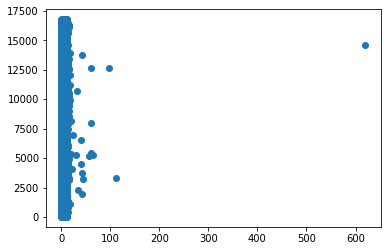

In [399]:
plt.scatter(test_data['KitchenSquare'], test_data['Id'])
plt.show()

In [400]:
test_data.loc[(test_data['KitchenSquare']>=100)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B
1777,3341,62,3.0,112.247841,112.114019,112.0,3,3.0,2017,0.072158,2,629,1,900.0,0,0,0,1,0,1,1,0
1964,14594,11,2.0,42.795304,24.223770,620.0,11,14.0,1972,0.038693,28,6533,1,1015.0,2,5,0,1,0,1,0,1


In [401]:
test_data.loc[(test_data['Id']==3341), ['KitchenSquare']] = 0

In [402]:
test_data.loc[(test_data['Id']==14594), ['KitchenSquare']] = 8

In [403]:
test_data.loc[(test_data['Id']==14594)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B
1964,14594,11,2.0,42.795304,24.22377,8.0,11,14.0,1972,0.038693,28,6533,1,1015.0,2,5,0,1,0,1,0,1


In [404]:
test_data.loc[(test_data['KitchenSquare'])>(test_data['Square'])]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B
2424,10662,29,1.0,25.956829,17.251768,33.0,5,5.0,1973,0.069660,31,6119,4,900.0,1,2,0,1,0,1,0,1
3863,3194,29,2.0,43.926987,31.028707,44.0,6,5.0,1964,0.086885,10,2277,2,1547.0,0,0,0,1,0,1,0,1
4555,12640,6,2.0,54.629142,31.486308,97.0,4,17.0,2015,0.243205,5,1564,0,540.0,0,0,0,1,0,1,0,1


In [405]:
test_data.loc[(test_data['KitchenSquare'])>(test_data['Square']), 'KitchenSquare'] = 8

In [406]:
test_data.loc[(test_data['Id']==3194)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B
3863,3194,29,2.0,43.926987,31.028707,8.0,6,5.0,1964,0.086885,10,2277,2,1547.0,0,0,0,1,0,1,0,1


In [407]:
test_data.loc[(test_data['KitchenSquare']>=50)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B
40,5428,27,2.0,62.326044,37.395626,61.0,12,17.0,1977,0.072158,2,629,1,900.0,0,0,0,1,0,1,1,0
1456,5260,73,3.0,69.358242,51.247581,65.0,6,6.0,1931,0.042032,37,6856,84,1940.0,2,5,0,1,0,1,0,1
3816,12612,27,2.0,60.988496,33.646726,60.0,5,17.0,2013,0.072158,2,629,1,900.0,0,0,0,1,0,1,1,0
4281,8015,27,1.0,66.099096,33.639611,62.0,3,7.0,2016,0.014058,1,290,0,900.0,0,0,0,1,0,1,0,1
4405,5199,27,2.0,61.647531,59.054990,57.0,13,12.0,2016,0.211401,9,1892,0,900.0,0,1,0,1,0,1,0,1


In [408]:
test_data.loc[(test_data['KitchenSquare']>=50) & (test_data['Rooms']<=2), 'KitchenSquare'] = 8

In [409]:
test_data.loc[(test_data['KitchenSquare']>=50) & (test_data['Rooms']==3), 'KitchenSquare'] = 9

In [410]:
test_data.loc[(test_data['Id']==5260)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B
1456,5260,73,3.0,69.358242,51.247581,9.0,6,6.0,1931,0.042032,37,6856,84,1940.0,2,5,0,1,0,1,0,1


In [411]:
test_data.loc[(test_data['KitchenSquare']>=30)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B
625,2249,62,1.0,78.281763,77.157675,34.0,5,24.0,2016,0.072158,2,629,1,900.0,0,0,0,1,0,1,1,0
803,3747,23,5.0,139.045763,89.790274,42.0,1,3.0,2015,0.014073,2,475,0,900.0,0,0,0,1,0,1,0,1
870,13736,27,1.0,141.540215,91.704806,42.0,3,3.0,2013,0.014073,2,475,0,900.0,0,0,0,1,0,1,0,1
1447,1968,27,2.0,138.039182,92.484098,42.0,3,3.0,2016,0.014073,2,475,0,900.0,0,0,0,1,0,1,0,1
3723,4483,62,1.0,45.672140,41.951462,41.0,13,17.0,2018,0.072158,2,629,1,900.0,0,0,0,1,0,1,1,0
3927,6568,78,1.0,46.827201,40.227011,40.0,5,32.0,2007,0.219006,28,6746,3,900.0,1,4,0,1,0,1,0,1
4546,5254,186,2.0,88.618122,25.457811,30.0,5,19.0,1985,0.007659,35,7077,56,2301.0,3,19,0,1,0,1,0,1


In [412]:
test_data.loc[(test_data['Id']==4483), 'KitchenSquare']= ((test_data['Square'] - test_data['LifeSquare'])*0.3)

In [413]:
test_data.loc[(test_data['Id']==6568), 'KitchenSquare'] = ((test_data['Square'] - test_data['LifeSquare'])*0.3)

In [414]:
test_data.loc[(test_data['Id']==2249), 'KitchenSquare'] = ((test_data['Square'] - test_data['LifeSquare'])*0.3)

In [415]:
test_data.loc[(test_data['Id']==6568)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B
3927,6568,78,1.0,46.827201,40.227011,1.980057,5,32.0,2007,0.219006,28,6746,3,900.0,1,4,0,1,0,1,0,1


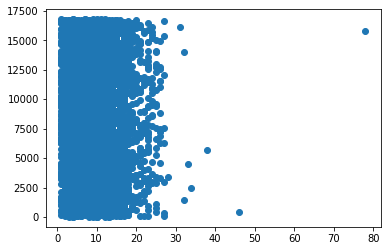

In [416]:
plt.scatter(test_data['Floor'], test_data['Id'])
plt.show()

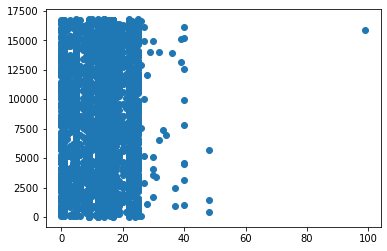

In [417]:
plt.scatter(test_data['HouseFloor'], test_data['Id'])
plt.show()

In [418]:
test_data.loc[test_data['Floor']>50]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B
4698,15759,17,2.0,57.60187,37.744743,10.0,78,22.0,1989,0.0,25,5027,4,46.0,1,1,0,1,0,1,0,1


In [419]:
test_data.loc[test_data['HouseFloor']>50]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B
651,15864,27,3.0,47.722835,47.098813,9.0,18,99.0,1977,0.072158,2,629,1,900.0,0,0,0,1,0,1,1,0


In [420]:
(train_data['Floor']).median()

7.0

In [421]:
(train_data['HouseFloor']).median()

12.0

In [422]:
test_data.loc[test_data['Floor']>50, 'Floor'] = (train_data['Floor']).median()

In [423]:
test_data.loc[test_data['HouseFloor']>50, 'HouseFloor'] = (test_data['Floor'] + 1)

In [424]:
test_data.loc[test_data['HouseFloor']==0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B
22,12694,27,3.0,83.670032,46.358356,0.0,8.0,0.0,2015,0.072158,2,629,1,900.0,0,0,0,1,0,1,1,0
24,8968,27,2.0,69.849239,41.909544,0.0,3.0,0.0,1977,0.011654,4,915,0,900.0,0,0,0,1,0,1,0,1
30,2982,6,2.0,63.460684,38.076411,0.0,13.0,0.0,1977,0.243205,5,1564,0,540.0,0,0,0,1,0,1,0,1
32,2449,1,1.0,66.426585,39.855951,0.0,14.0,0.0,1977,0.007122,1,264,0,900.0,0,1,0,1,0,1,0,1
46,12309,45,1.0,42.899569,25.739741,0.0,25.0,0.0,1977,0.195781,23,5212,6,900.0,3,2,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4856,10262,27,2.0,69.196440,41.517864,0.0,10.0,0.0,1977,0.017647,2,469,0,900.0,0,0,0,1,0,1,0,1
4887,12116,88,3.0,89.549559,53.729735,0.0,20.0,0.0,1977,0.127376,43,8429,3,900.0,3,9,0,1,0,1,0,1
4892,16357,58,1.0,49.205978,29.523587,0.0,4.0,0.0,1977,0.437885,23,5735,3,1084.0,0,5,0,1,0,1,0,1
4976,4723,95,1.0,45.542940,27.325764,0.0,6.0,0.0,1977,0.000699,14,3369,24,4129.0,0,3,0,1,0,1,0,1


In [425]:
test_data.loc[test_data['HouseFloor']==0, 'HouseFloor'] = test_data['Floor']

In [426]:
test_data.loc[test_data['Floor']==0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B


In [427]:
test_data.loc[test_data['Floor']>test_data['HouseFloor']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B
1,15856,74,2.0,69.263183,41.557910,1.0,6.0,1.0,1977,0.075779,6,1437,3,900.0,0,2,0,1,0,1,0,1
10,15975,61,3.0,64.543658,42.651541,7.0,10.0,9.0,1981,0.300323,52,10311,6,900.0,1,9,0,1,0,1,0,1
14,5214,27,1.0,37.555197,22.533118,1.0,5.0,1.0,1977,0.211401,9,1892,0,900.0,0,1,0,1,0,1,0,1
27,11160,58,1.0,48.752502,48.610661,1.0,4.0,3.0,1977,0.437885,23,5735,3,1084.0,0,5,0,1,0,1,0,1
36,9348,205,1.0,37.480811,16.851795,8.0,6.0,5.0,1933,0.169091,19,3856,10,900.0,2,5,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4968,15181,27,4.0,104.664209,66.903563,1.0,4.0,1.0,2016,0.017647,2,469,0,900.0,0,0,0,1,0,1,0,1
4972,16064,30,1.0,38.376234,37.003311,1.0,2.0,1.0,1977,0.000078,22,6398,141,1046.0,3,23,0,1,0,1,0,1
4989,2591,39,2.0,44.203592,30.191691,6.0,10.0,9.0,1972,0.428826,25,5011,8,730.0,0,2,0,1,0,1,0,1
4993,14562,113,2.0,46.627882,27.058739,5.0,6.0,5.0,1969,0.307467,30,5048,9,325.0,2,5,0,1,1,0,0,1


In [428]:
test_data_1 = test_data.copy()

In [429]:
test_data.loc[test_data['Floor']>test_data['HouseFloor'], 'HouseFloor'] = test_data_1['Floor']

In [430]:
test_data.loc[test_data['Floor']>=test_data['HouseFloor'], 'Floor'] = test_data_1['HouseFloor']

In [431]:
test_data.loc[(test_data['Id']==15856)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B
1,15856,74,2.0,69.263183,41.55791,1.0,1.0,6.0,1977,0.075779,6,1437,3,900.0,0,2,0,1,0,1,0,1


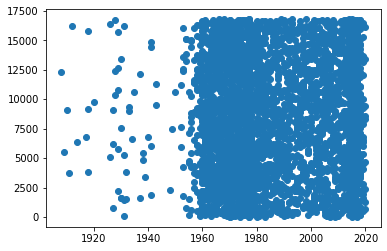

In [432]:
plt.scatter(test_data['HouseYear'], test_data['Id'])
plt.show()

In [433]:
test_data.loc[test_data['HouseYear']<1920]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B
2,5480,190,1.0,15.948246,13.597819,12.0,2.0,5.0,1909,0.000000,30,7538,87,4702.0,5,5,0,1,0,1,0,1
64,3726,161,1.0,52.708494,20.502345,11.0,3.0,7.0,1911,0.014423,19,3806,4,900.0,0,3,0,1,0,1,0,1
600,6764,104,2.0,45.581024,26.982432,6.0,5.0,5.0,1917,0.000078,22,6398,141,1046.0,3,23,0,1,0,1,0,1
1475,16217,206,4.0,76.428426,50.344903,11.0,6.0,7.0,1912,0.042032,37,6856,84,1940.0,2,5,0,1,0,1,0,1
2323,9155,204,3.0,88.559337,62.854221,8.0,7.0,8.0,1918,0.037316,32,6748,93,562.0,4,10,0,1,0,1,0,1
2691,9076,60,3.0,61.400464,38.591813,8.0,5.0,5.0,1910,0.341072,27,5664,48,2300.0,3,11,0,1,0,1,0,1
2856,6372,155,2.0,78.165510,51.014094,10.0,5.0,5.0,1914,0.042307,17,2810,9,4849.0,3,6,0,1,0,1,0,1
3253,12316,183,5.0,157.976101,101.040485,12.0,7.0,8.0,1908,0.246624,14,2940,45,900.0,3,6,0,1,0,1,0,1
3337,3823,51,1.0,41.164414,20.377670,7.0,5.0,6.0,1918,0.015017,17,3079,59,2890.0,0,8,0,1,0,1,0,1
3654,15833,4,3.0,71.607304,52.384149,7.0,5.0,6.0,1918,0.327018,12,2270,23,2500.0,1,0,0,1,0,1,0,1


In [434]:
test_data.loc[test_data['HouseYear']>2020]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B


In [435]:
train_data.to_csv('train_data.csv', sep=';', index=False)

In [436]:
train_price.to_pickle("train_price.pkl")

In [437]:
test_data.to_csv('test_data.csv', sep=';', index=False)

In [438]:
train_data.loc[(train_data['Id']==3060)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecoligy_2_A,Ecoligy_2_B,Ecoligy_3_A,Ecoligy_3_B,Shops_2_A,Shops_2_B
